In [ ]:
import sys, os
sys.path.append('..'); os.chdir('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [19]:
label_map = {
    'ccc_v': 'Valence CCC',
    'ccc_a': 'Arousal CCC',
    'rmse_v': 'Valence RMSE',
    'rmse_a': 'Arousal RMSE',
    'expr_acc': 'Expression Accuracy',
}

In [34]:
# plot subplots
df = pd.read_csv("data/emodataset/evaluations.csv")
df

,model,ccc_v,ccc_a,ccc_mean,rmse_v,rmse_a,mae_v,mae_a,expr_acc,description
0,emonet_8_untrained.pth,0.0004,0.0017,0.0011,0.6820,0.4930,0.6566,0.3960,0.0599,Untrained (control)
1,emonet_8.pth,0.5240,0.1620,0.3430,0.5390,0.4150,0.4270,0.3340,0.5840,Pretrained
2,emonet_8_15ep_scratch.pth,0.6694,0.1768,0.4231,0.5279,0.3837,0.3924,0.3129,0.5839,Trained (15 epochs BCK_FROZ)
3,emonet_8_FT_5ep.pth,0.7502,0.3132,0.5317,0.4710,0.3419,0.3453,0.2826,0.7202,Fine-tuned (5 epochs)
4,emonet_8_FT_5ep_mod.pth,0.7504,0.3078,0.5291,0.4707,0.6849,0.3441,0.5654,0.7219,Fine-tuned (5 epochs) AROUSAL_MOD
5,emonet_8_FT_16ep.pth,0.7707,0.3234,0.5470,0.4490,0.3356,0.3218,0.2808,0.7335,Fine-tuned (16 epochs)


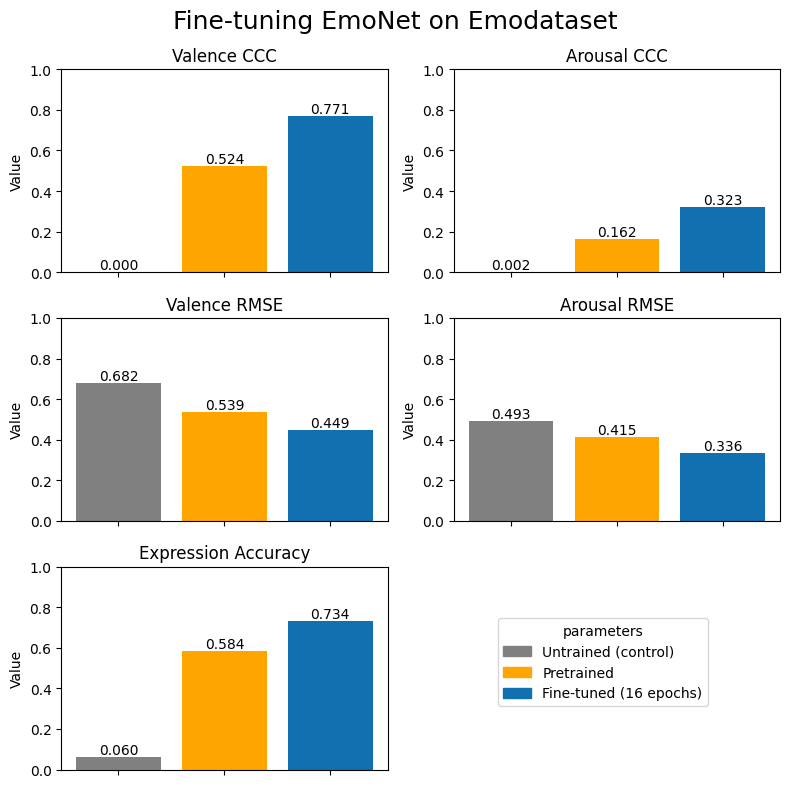

In [ ]:
# PLOT: 
INCLUDE_MODELS = [
    "emonet_8_15ep_scratch.pth",
    "emonet_8_FT_5ep_mod.pth",
    "emonet_8_FT_5ep.pth",
]
df_plot = df[df["model"].isin(INCLUDE_MODELS)]

metrics = ['ccc_v','ccc_a','rmse_v','rmse_a','expr_acc']

models = df_plot['parameters_file'].tolist()
descriptions = df_plot['description'].tolist()
x = np.arange(len(models))

colors = ["grey", "orange", "#1070b0", "blue", "cyan", "red"]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    values = df_plot[metric].tolist()
    bars = ax.bar(x, values, color=colors)
    ax.set_title(label_map[metric])
    ax.set_xticks(x)
    ax.set_ylim(0, 1)
    ax.set_xticklabels([])  # remove x-axis labels
    ax.set_ylabel('Value')

    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, value,
                f'{value:.3f}', ha='center', va='bottom')

plt.suptitle('Fine-tuning EmoNet on Emodataset', fontsize=18)
axes[-1].axis('off')

handles = [ mpatches.Patch(color=color, label=desc) for color, desc in zip(colors, descriptions) ]
fig.legend(handles=handles, loc='lower right', bbox_to_anchor=(0.9, 0.1), title='parameters')
plt.tight_layout()
plt.show()

,model,ccc_v,ccc_a,ccc_mean,rmse_v,rmse_a,mae_v,mae_a,expr_acc,description
1,emonet_8.pth,0.5240,0.1620,0.343,0.539,0.4150,0.4270,0.3340,0.5840,Pretrained
5,emonet_8_FT_16ep.pth,0.7707,0.3234,0.547,0.449,0.3356,0.3218,0.2808,0.7335,Fine-tuned (16 epochs)


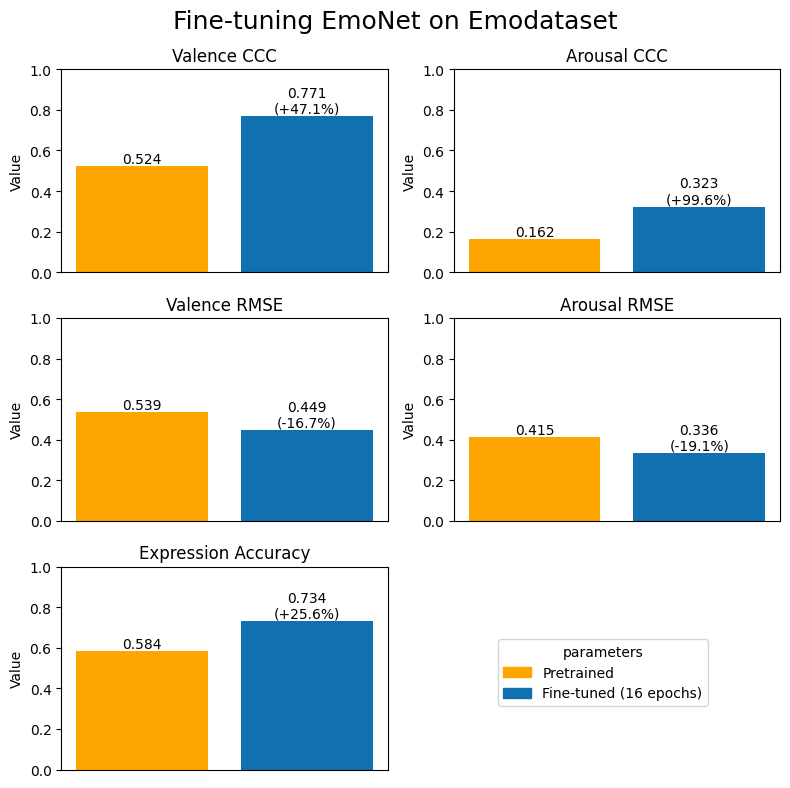

In [55]:
# PLOT: evaluations percent diff
INCLUDE_MODELS = [
    "emonet_8.pth",
    "emonet_8_FT_16ep.pth",
]
df_plot = df[df["model"].isin(INCLUDE_MODELS)]

metrics = ['ccc_v','ccc_a','rmse_v','rmse_a','expr_acc']
colors = ["orange", "#1070b0", "blue", "cyan", "red"]

models = df_plot['model'].tolist()
descriptions = df_plot['description'].tolist()
x = np.arange(len(models))

# plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
plt.suptitle('Fine-tuning EmoNet on Emodataset', fontsize=18)
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    values = df_plot[metric].tolist()
    bars = ax.bar(range(len(values)), values, color=colors)
    ax.set_title(label_map[metric])
    ax.set_xticks([])
    ax.set_ylim(0, 1)
    ax.set_xticklabels([])  # remove x-axis labels
    ax.set_ylabel('Value')

    # display value above bar
    base_value = None
    for bar, value in zip(bars, values):
        perc_str = ""
        if base_value is None:
            base_value = value
        else:
            perc = (value - base_value) / base_value
            perc_str = f"\n({perc*100:+.1f}%)"
        ax.text(bar.get_x() + bar.get_width()/2, value,
                f'{value:.3f}{perc_str}', ha='center', va='bottom')

axes[-1].axis('off')

handles = [ mpatches.Patch(color=color, label=desc) for color, desc in zip(colors, descriptions) ]
fig.legend(handles=handles, loc='lower right', bbox_to_anchor=(0.9, 0.1), title='parameters')
plt.tight_layout()
plt.show()